In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, precision_score,plot_confusion_matrix,roc_auc_score

from sklearn.feature_selection import SelectPercentile

In [2]:
bank = pd.read_csv('bankloan.csv')
bank

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


> ## Data Splitting

In [3]:
feature = ['employ','debtinc','creddebt','othdebt']
target = ['default']

In [4]:
X = bank[feature]
y = bank[target]

In [5]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,random_state=2020,stratify=y,test_size=0.2)

> ## Model Evaluation : Benchmark

# Kita lebih fokus ke Positive (FP, TP)

In [39]:
logreg = LogisticRegression(random_state=2021)
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(random_state=2021)

In [40]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [41]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

In [42]:
skfold = StratifiedKFold(n_splits=5,random_state=24, shuffle=True) #meng-guarantee ratio y pada train dan val sama.

logreg_cv = cross_val_score(logreg, X_train_val, y_train_val, cv=skfold, scoring='recall')
knn_cv = cross_val_score(knn, X_train_val, y_train_val, cv=skfold, scoring='recall')
dtc_cv = cross_val_score(dtc, X_train_val, y_train_val, cv=skfold, scoring='recall')

In [43]:
print('CV Logistic Regression :', logreg_cv)
print('CV KNN :', knn_cv)
print('CV DTC :', dtc_cv)

CV Logistic Regression : [0.43333333 0.51724138 0.31034483 0.48275862 0.44827586]
CV KNN : [0.4        0.4137931  0.17241379 0.4137931  0.24137931]
CV DTC : [0.53333333 0.62068966 0.37931034 0.34482759 0.65517241]


In [44]:
print('CV Logistic Regression', logreg_cv.mean())
print('CV KNN', knn_cv.mean())
print('CV DTC', dtc_cv.mean())

CV Logistic Regression 0.43839080459770124
CV KNN 0.32827586206896553
CV DTC 0.5066666666666666


In [45]:
def model_evaluation_cv(model,metric):
    skfold=StratifiedKFold(n_splits=5, random_state=24, shuffle=True)
    model_cv = cross_val_score(model, X_train_val, y_train_val, cv=skfold, scoring=metric)
    return model_cv

In [46]:
def print_results(model_cv):
    print('CV Score:', model_cv)
    print('CV Mean:', model_cv.mean())
    print('CV Std Deviasi:', model_cv.std())

In [60]:
print('F1')
model_cvf1 = model_evaluation_cv(logreg,'f1')
print_results(model_cvf1)
print('')
print('Recall')
model_cvrc = model_evaluation_cv(logreg,'recall')
print_results(model_cvrc)
print('')
print('Precision')
model_cvpr = model_evaluation_cv(logreg,'precision')
print_results(model_cvpr)

F1
CV Score: [0.52       0.53571429 0.39130435 0.62222222 0.57777778]
CV Mean: 0.5294037267080745
CV Std Deviasi: 0.07765953078015073

Recall
CV Score: [0.43333333 0.51724138 0.31034483 0.48275862 0.44827586]
CV Mean: 0.43839080459770124
CV Std Deviasi: 0.07029221982966803

Precision
CV Score: [0.65       0.55555556 0.52941176 0.875      0.8125    ]
CV Mean: 0.6844934640522876
CV Std Deviasi: 0.1375089308126108


In [63]:
print('F1')
model_cvf1 = model_evaluation_cv(knn,'f1')
print_results(model_cvf1)
print('')
print('Recall')
model_cvrc = model_evaluation_cv(knn,'recall')
print_results(model_cvrc)
print('')
print('Precision')
model_cvpr = model_evaluation_cv(knn,'precision')
print_results(model_cvpr)

F1
CV Score: [0.5        0.375      0.25641026 0.5106383  0.31818182]
CV Mean: 0.392046074492883
CV Std Deviasi: 0.09986164192664394

Recall
CV Score: [0.4        0.4137931  0.17241379 0.4137931  0.24137931]
CV Mean: 0.32827586206896553
CV Std Deviasi: 0.10160191371422286

Precision
CV Score: [0.66666667 0.34285714 0.5        0.66666667 0.46666667]
CV Mean: 0.5285714285714286
CV Std Deviasi: 0.12432128664442452


In [62]:
print('F1')
model_cvf1 = model_evaluation_cv(dtc,'f1')
print_results(model_cvf1)
print('')
print('Recall')
model_cvrc = model_evaluation_cv(dtc,'recall')
print_results(model_cvrc)
print('')
print('Precision')
model_cvpr = model_evaluation_cv(dtc,'precision')
print_results(model_cvpr)

F1
CV Score: [0.57142857 0.6        0.44       0.36363636 0.65517241]
CV Mean: 0.5260474697716078
CV Std Deviasi: 0.10768770285738721

Recall
CV Score: [0.53333333 0.62068966 0.37931034 0.34482759 0.65517241]
CV Mean: 0.5066666666666666
CV Std Deviasi: 0.12504225735719698

Precision
CV Score: [0.61538462 0.58064516 0.52380952 0.38461538 0.65517241]
CV Mean: 0.55192541977859
CV Std Deviasi: 0.09412224636604662


### Coba test model2 lainnya

> ## Model Performance In Test Set

In [15]:
logreg.fit(X_train_val, y_train_val)

LogisticRegression()

In [16]:
y_pred = logreg.predict(X_test)

In [17]:
print('recall', recall_score(y_test, y_pred))
print('precision', precision_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

recall 0.4594594594594595
precision 0.7727272727272727
f1 0.576271186440678


In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       103
           1       0.77      0.46      0.58        37

    accuracy                           0.82       140
   macro avg       0.80      0.71      0.73       140
weighted avg       0.82      0.82      0.80       140



In [19]:
confusion_matrix(y_test,y_pred)

array([[98,  5],
       [20, 17]], dtype=int64)

In [20]:
def make_confusion_matrix(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    conf_df = pd.DataFrame(
    {'Prediction 0':[tn,fn,tn+tp],
    'Prediction 1':[fp,tp,fn+fp]},index=['Actual 0','Actual 1','Total Prediction'])
    conf_df['Total_Actual']=conf_df['Prediction 0']+ conf_df['Prediction 1']
    return conf_df

In [21]:
make_confusion_matrix(confusion_matrix(y_test, y_pred))

,Prediction 0,Prediction 1,Total_Actual
Actual 0,98,5,103
Actual 1,20,17,37
Total Prediction,115,25,140


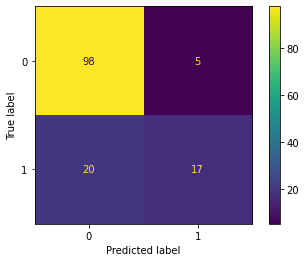

In [22]:
plot_confusion_matrix(logreg, X_test,y_test)
plt.show()

In [67]:
dtc.fit(X_train_val, y_train_val)
y_pred_dtc = dtc.predict(X_test)

In [68]:
print('recall', recall_score(y_test, y_pred_dtc))
print('precision', precision_score(y_test, y_pred_dtc))
print('f1', f1_score(y_test, y_pred_dtc))

recall 0.5135135135135135
precision 0.4523809523809524
f1 0.48101265822784806


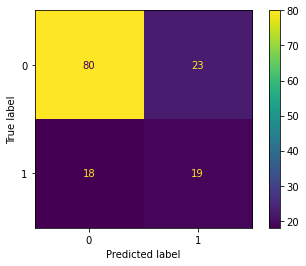

In [69]:
plot_confusion_matrix(dtc, X_test,y_test)
plt.show()

In [23]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve

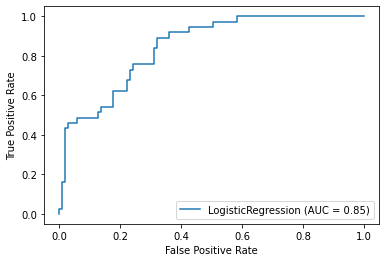

In [24]:
plot_roc_curve(logreg, X_test, y_test)
plt.show()

In [25]:
len(X_test)

140

In [26]:
proba = logreg.predict_proba(X_test)
proba_1 = proba[:,1]
fpr, tpr, thr = roc_curve(y_test, proba_1)
auc_score = roc_auc_score(y_test,proba_1)

In [77]:
proba = pd.DataFrame(proba_1)
proba

,0
0,0.584047
1,0.308845
2,0.309486
3,0.397997
4,0.236397
...,...
135,0.542598
136,0.012185
137,0.102422
138,0.060572


In [72]:
y_test

,default
118,1
309,0
339,1
686,0
639,0
...,...
597,1
58,0
467,0
148,0


In [27]:
thr_df = pd.DataFrame({'TPR':tpr,
                      'FPR':fpr,
                      'THR':thr})
thr_df

,TPR,FPR,THR
0,0.000000,0.000000,1.946402
1,0.027027,0.000000,0.946402
2,0.027027,0.009709,0.936201
3,0.162162,0.009709,0.730020
4,0.162162,0.019417,0.703232
5,0.432432,0.019417,0.542598
6,0.432432,0.029126,0.518825
7,0.459459,0.029126,0.515155
8,0.459459,0.058252,0.498525
9,0.486486,0.058252,0.494954


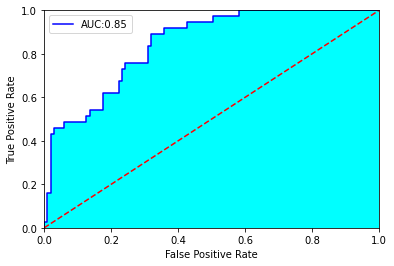

In [28]:
plt.plot(fpr,tpr,'blue',label=f'AUC:{round(auc_score,2)}')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.fill_between(fpr,tpr,0,facecolor='aqua',alpha=1)
plt.show()

In [29]:
thr_df[(thr_df['TPR']>=0.8) & (thr_df['FPR']<0.4)]

,TPR,FPR,THR
23,0.837838,0.310680,0.260223
24,0.837838,0.320388,0.253305
25,0.891892,0.320388,0.239033
26,0.891892,0.359223,0.215838
27,0.918919,0.359223,0.215545


In [30]:
y_pred_021 = [1 if prob1>0.215545 else 0 for prob1 in logreg.predict_proba(X_test)[:,1]]
make_confusion_matrix(confusion_matrix(y_test, y_pred_021))

,Prediction 0,Prediction 1,Total_Actual
Actual 0,66,37,103
Actual 1,4,33,37
Total Prediction,99,41,140


In [31]:
recall_score(y_test,y_pred_021)

0.8918918918918919

In [32]:
make_confusion_matrix(confusion_matrix(y_test, y_pred))

,Prediction 0,Prediction 1,Total_Actual
Actual 0,98,5,103
Actual 1,20,17,37
Total Prediction,115,25,140


In [33]:
recall_score(y_test,y_pred)

0.4594594594594595

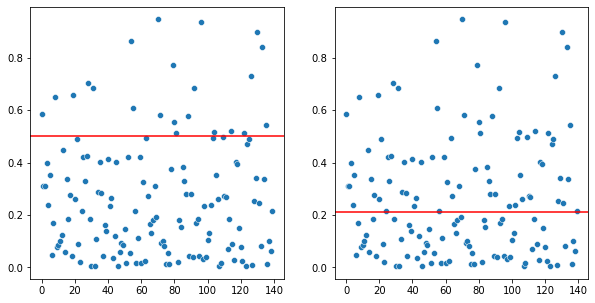

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.scatterplot(x=range(len(proba_1)), y=proba_1)
plt.axhline(0.5,color='red')

plt.subplot(122)
sns.scatterplot(x=range(len(proba_1)), y=proba_1)
plt.axhline(0.21,color='red')
plt.show()